In [1]:
import pandas as pd
import numpy as np

In [2]:
N = 20  # number of questions
M = 100  # number of articles

In [3]:
import json
import numpy as np

with open("Alignment_eng_Territorial_disputes_in_the_South_China_Sea.json") as f:
    data = json.load(f)

# Initialize a list to store the extracted values
llm_zho = []

# Iterate through the JSON objects to extract `post_LLM_answer`
for item in data:
    if "QnA" in item:
        for qna in item["QnA"]:
            if "post_LLM_answer" in qna:
                llm_zho.append(qna["post_LLM_answer"])

# reshape the list to a MxN matrix
llm_zho = np.array(llm_zho).reshape(-1, 1)
llm_zho = np.array(llm_zho).reshape(M, N)
# print(llm_zho)

In [4]:
import json
import numpy as np

with open("Alignment_zho_Territorial_disputes_in_the_South_China_Sea.json") as f:
    data = json.load(f)

# Initialize a list to store the extracted values
llm_eng = []

# Iterate through the JSON objects to extract `post_LLM_answer`
for item in data:
    if "QnA" in item:
        for qna in item["QnA"]:
            if "post_LLM_answer" in qna:
                llm_eng.append(qna["post_LLM_answer"])

# reshape the list to a MxN matrix
llm_eng = np.array(llm_eng).reshape(-1, 1)
llm_eng = np.array(llm_eng).reshape(M, N)
# print(llm_eng)

In [5]:
# calculate the matching score between the two languages and store the result in a new matrix
import numpy as np


def matching_score(matrix_a, matrix_b):
    matching_score = np.zeros((len(matrix_a), len(matrix_b)))
    for i in range(len(matrix_a)):
        for j in range(len(matrix_b)):
            # if the two languages are the same, the matching score is 1

            for n in range(N):
                if matrix_a[i][n] == matrix_b[j][n]:
                    matching_score[i][j] += 1
    return matching_score / N


matching = matching_score(llm_zho, llm_eng)
print(matching)

[[0.8  0.8  0.8  ... 0.7  0.6  0.7 ]
 [0.65 0.55 0.55 ... 0.55 0.55 0.65]
 [0.75 0.75 0.75 ... 0.75 0.85 0.65]
 ...
 [0.75 0.65 0.65 ... 0.55 0.55 0.55]
 [0.8  0.7  0.7  ... 0.6  0.6  0.5 ]
 [0.6  0.6  0.6  ... 0.7  0.7  0.8 ]]


In [6]:
import numpy as np

matches = matching.flatten()
# Find the indices of the top 3 maximum values
k = 10
flatten_indices = np.argpartition(matches, -k)[-k:]

# Convert the flattened indices to 2D indices
indices = np.unravel_index(flatten_indices, matching.shape)

print(indices)

(array([24, 36, 14, 82, 47, 46, 76, 57, 82, 85]), array([ 2,  2, 54, 94, 90,  5, 64, 64, 83, 86]))


## Plot matching histograms

Text(0.5, 1.0, 'Distribution of matches for 100 Chinese and 100 English news articles \n (Territorial disputes in the South China Sea, 20 questions)')

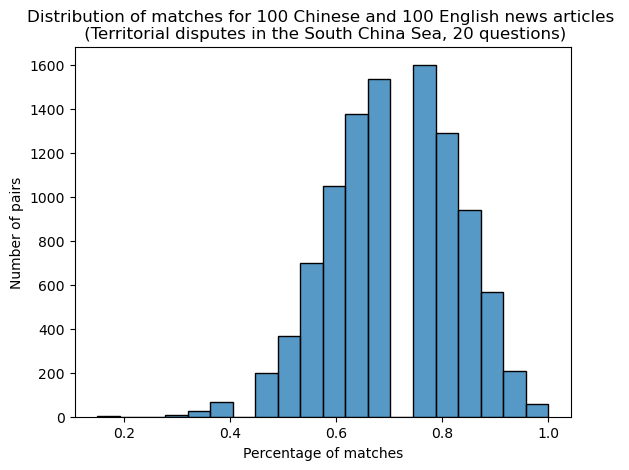

In [7]:
# plot the distribution of matches using seaborn

import seaborn as sns

ax = sns.histplot(matches, bins=20)

# set the x-axis label
ax.set_xlabel("Percentage of matches")
ax.set_ylabel("Number of pairs")
ax.set_title(
    f"Distribution of matches for {M} Chinese and {M} English news articles \n (Territorial disputes in the South China Sea, {N} questions)"
)

In [8]:
# show the statistics summary of the matches
print(pd.Series(matches).describe())

count    10000.000000
mean         0.709380
std          0.121377
min          0.150000
25%          0.650000
50%          0.700000
75%          0.800000
max          1.000000
dtype: float64


In [10]:
# count the number of pairs with a match score of 1
print(np.count_nonzero(matches == 1))

57


In [12]:
# list the indices of the pairs with a match score of 1
indices = np.argwhere(matching == 1)
print(indices)

[[14 54]
 [16 93]
 [18 63]
 [24  1]
 [24  2]
 [24  3]
 [31 90]
 [34  1]
 [34  2]
 [34  3]
 [36  1]
 [36  2]
 [36  3]
 [45 82]
 [46  5]
 [46 64]
 [46 83]
 [46 94]
 [47 90]
 [53  5]
 [53 64]
 [53 83]
 [53 94]
 [56 90]
 [57  5]
 [57 64]
 [57 83]
 [57 94]
 [60 90]
 [69 35]
 [72  5]
 [72 64]
 [72 83]
 [72 94]
 [74 63]
 [76  5]
 [76 64]
 [76 83]
 [76 94]
 [78 45]
 [79 86]
 [82  5]
 [82 64]
 [82 83]
 [82 94]
 [84  5]
 [84 64]
 [84 83]
 [84 94]
 [85 86]
 [87  5]
 [87 64]
 [87 83]
 [87 94]
 [92  1]
 [92  2]
 [92  3]]


In [19]:
zho_articles_file = "Alignment_zho_Territorial_disputes_in_the_South_China_Sea.json"
eng_articles_file = "Alignment_eng_Territorial_disputes_in_the_South_China_Sea.json"

In [45]:
# verify the answers with indices of the pairs
def verify_matches(indice, file1=zho_articles_file, file2=eng_articles_file):
    with open(file1) as f:
        data = json.load(f)
        for qna in data[indice[1]]["QnA"]:
            print(qna["post_LLM_answer"], end="")
        print("\n")
        # print(data[indice[0]]["body"])

    with open(file2) as f:
        data = json.load(f)
        for qna in data[indice[0]]["QnA"]:
            print(qna["post_LLM_answer"], end="")
        print("\n")
        # print(data[indice[1]]["body"])

In [65]:
verify_matches(indices[-4])

ABABBBBBBBBBBAABBBBB

ABABBBBBBBBBBAABBBBB



In [52]:
def print_matches(indice, file1=zho_articles_file, file2=eng_articles_file):
    with open(file1) as f:
        data = json.load(f)

        print(data[indice[1]]["url"])

    with open(file2) as f:
        data = json.load(f)

        print(data[indice[0]]["url"])

In [59]:
print_matches([34, 3])

https://tw.news.yahoo.com/%E6%A7%8D%E6%8C%87%E4%B8%AD%E5%9C%8B%E6%B5%B7%E8%AD%A6-%E5%8C%97%E4%BA%AC%E8%A6%81%E6%B1%82%E8%8F%B2%E5%BE%8B%E8%B3%93%E8%8E%AB%E5%86%8D%E8%A3%BD%E9%80%A0%E4%BA%8B%E7%AB%AF-093908540.html
https://www.dailymail.co.uk/wires/reuters/article-13491719/Philippines-rejects-Chinese-allegation-troops-point-guns-coast-guard.html


In [60]:
def print_url_by_indices(indices, file=eng_articles_file):
    with open(file) as f:
        data = json.load(f)
        for indice in indices:
            print(data[indice]["url"])

## Analysis

### cluster 1 - mix of 2 and 3

In [71]:
verify_matches(indices[14])

ABABBBBBBBBBBAABBBBB

ABABBBBBBBBBBAABBBBB



In [64]:
print_url_by_indices([5, 64, 83, 94], file=zho_articles_file)

https://news.ifeng.com/c/8a8gxX9gvix
https://www.takungpao.com/news/232108/2024/0603/977740.html
https://news.ifeng.com/c/8a4THFI9xCq
https://news.ifeng.com/c/8a41LZSmd2M


In [66]:
print_url_by_indices([46, 53, 57, 72, 76, 82, 84, 87], file=eng_articles_file)

http://legacy.senate.gov.ph/press_release/2024/0603_estradaj1.asp
https://www.manilatimes.net/2024/06/04/opinion/columns/the-kings-speech/1949762
https://www.miamiherald.com/news/nation-world/world/article288961265.html
https://news.am/eng/news/826923.html
https://www.japantimes.co.jp/news/2024/06/03/asia-pacific/politics/china-philippines-south-china-sea-row/
https://www.dailymail.co.uk/wires/reuters/article-13487359/China-says-US-plays-dishonorable-role-supporting-Philippines-S-China-Sea.html
https://www.myrtlebeachonline.com/news/nation-world/national/article288954684.html
https://www.bnnbloomberg.ca/zelenskiy-meets-marcos-in-manila-as-ukraine-seeks-asia-support-1.2080173


### cluster 2 - Philippine ship pointed guns at China's coast guard

In [70]:
verify_matches(indices[-1])

ABABBABABBBBBABBBBBB

ABABBABABBBBBABBBBBB



In [62]:
print_url_by_indices([1, 2, 3], file=zho_articles_file)  # same news articles in Chinese

https://www.cna.com.tw/news/acn/202406040330.aspx
https://udn.com/news/story/7331/8009562
https://tw.news.yahoo.com/%E6%A7%8D%E6%8C%87%E4%B8%AD%E5%9C%8B%E6%B5%B7%E8%AD%A6-%E5%8C%97%E4%BA%AC%E8%A6%81%E6%B1%82%E8%8F%B2%E5%BE%8B%E8%B3%93%E8%8E%AB%E5%86%8D%E8%A3%BD%E9%80%A0%E4%BA%8B%E7%AB%AF-093908540.html


In [63]:
print_url_by_indices([24, 34, 36, 92], file=eng_articles_file)

https://interaksyon.philstar.com/politics-issues/2024/06/04/276738/china-says-philippines-actions-towards-chinese-coast-guard-illegal/
https://www.dailymail.co.uk/wires/reuters/article-13491719/Philippines-rejects-Chinese-allegation-troops-point-guns-coast-guard.html
https://www.marketscreener.com/quote/index/CAC-MID-60-7892/news/Philippines-rejects-Chinese-allegation-that-troops-point-guns-at-its-coast-guard-46894677/
https://www.thestandard.com.hk/section-news/section/6/263296/Guns-'pointed-at-Chinese-coast-guards'


### cluster 3 - Shangri-La Dialogue

In [69]:
verify_matches(indices[6])

ABABBBBBBBBBBAABBBAB

ABABBBBBBBBBBAABBBAB



In [67]:
print_url_by_indices([90], file=zho_articles_file)

https://mil.sohu.com/a/783087241_121450895?scm=thor.279_13-101000-0_922.0-0.10095.a2_5X162X1532


In [68]:
print_url_by_indices([31, 47, 56, 60], file=eng_articles_file)

https://www.phnompenhpost.com/politics/ministry-calls-for-balanced-solution-to-south-china-sea-issue
https://www.thestar.com.my/aseanplus/aseanplus-news/2024/06/04/marcos-pledges-support-to-end-war
https://gazette.com/ap/international/zelenskyy-marcos-to-boost-ties-after-slamming-china-at-summit/article_fc8532db-5def-5611-9185-e1814eee351d.html
https://www.thestar.com.my/aseanplus/aseanplus-news/2024/06/03/philippines-to-join-peace-summit-on-ukraine-war-after-surprise-zelensky-visit


### cluster 4 - China - US relations

In [72]:
verify_matches(indices[40])

ABABBBBBBBBBBAABBBAA

ABABBBBBBBBBBAABBBAA



In [73]:
print_url_by_indices([86], file=zho_articles_file)

https://www.rfi.fr/cn/%E5%8F%B0%E6%B9%BE/20240601-%E5%8F%B0%E5%AA%92-%E8%83%A1%E8%90%9D%E5%8D%9C%E5%AF%B9%E7%BE%8E%E5%9B%BD-%E5%A4%A7%E6%A3%92%E6%8C%A5%E5%90%91%E5%8F%B0%E6%B9%BE


In [74]:
print_url_by_indices([79, 85], file=eng_articles_file)

https://www.gmanetwork.com/news/topstories/nation/908836/china-us-philippines-south-china-sea/story/
https://www.devdiscourse.com/article/law-order/2959062-china-criticizes-us-support-for-philippines-in-south-china-sea-disputes


### Cluster 5 - Importance of regional security and stability

In [75]:
verify_matches(indices[2])

ABABBABABBBBBAABBBBB

ABABBABABBBBBAABBBBB



In [76]:
print_url_by_indices([63], file=zho_articles_file)

https://std.stheadline.com/realtime/article/2002550/即時-中國-香格里拉對話︱董軍暗評菲律賓-在美煽動下仁愛礁-碰瓷


In [77]:
print_url_by_indices([18, 74], file=eng_articles_file)

https://mb.com.ph/2024/6/4/pbbm-calm-not-combative-in-shangri-la-dialogue-jinggoy-1
https://www.straitstimes.com/asia/china-says-us-plays-dishonourable-role-supporting-the-philippines-in-south-china-sea
